### Codio Activity 16.5: Comparing Margins in Classifiers

**Expected Time = 60 minutes** 

**Total Points = 45** 

This activity focuses on comparing different linear classification models and their margins.  You will draw linear boundaries on a sample dataset using algebra and compare their margins.  This is an intuitive introduction to choosing a maximum margin classifier.

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)
- [Problem 5](#-Problem-5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(cluster_std=2.0, centers = 2, random_state=42)

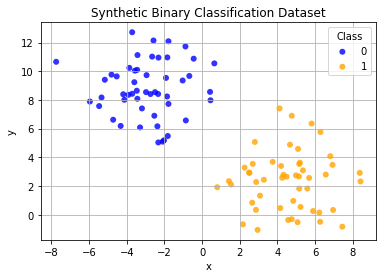

In [3]:
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, label=label,
               alpha=0.8, edgecolors='none')
ax.legend(title = 'Class')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)

In [4]:
df = pd.DataFrame(X, columns = ['x', 'y'])
df['class'] = y
df.head()

,x,y,class
0,-3.467546,8.642968,0
1,6.805981,4.080774,1
2,-3.597963,9.236131,0
3,6.283999,5.766756,1
4,5.094799,4.587455,1


[Back to top](#-Index)

### Problem 1

#### Linear Boundary through Given Points

**10 Points**

Create a linear function that goes through the two points where:

- $(x_0, y_0)$ corresponds to the point in class 1 with the lowest $x$ value. 
- $(x_1, y_1)$ corresponds to the point in class 0 with the highest $x$ value.

Define your points as `x0, y0` and `x1, y1`, determine the slope and write the equation by completing the function `boundary_1` below.

**RECALL**: A linear function can be determined as:

$$y = m(x_0 - x) + y_0$$

where $m$ is the slope (`slope0`) and $(x_0, y_0)$ is a point on the line.

Assign each of these as floats to their respective variables below.  Uncomment the code to visualize your completed boundary.

In [5]:
df[df['class'] == 1].sort_values(by='y', ascending=False)
#df[(df['class'] == 1) & (df['x'] == x0)]['y'].values[0]

,x,y,class
29,4.110565,7.413508,1
16,4.760339,6.899654,1
35,5.813593,6.354081,1
3,6.283999,5.766756,1
78,2.801030,5.073038,1
50,4.665883,4.880238,1
4,5.094799,4.587455,1
1,6.805981,4.080774,1
74,3.746849,3.685967,1
6,5.193260,3.627536,1


In [6]:
### GRADED
x0 = ''
x1 = ''
y0 = ''
y1 = ''
slope0 = ''
def boundary_1(x):
    '''
    This function takes in an array of x and 
    returns a linear boundary between class 0 and class 1
    using slope0.
    '''
    pass

# YOUR CODE HERE
#raise NotImplementedError()
x0 = df[df['class'] == 1]['x'].min()
x1 = df[df['class'] == 0]['x'].max()
y0 = df[(df['class'] == 1) & (df['x'] == x0)]['y'].values[0]
y1 = df[(df['class'] == 0) & (df['x'] == x1)]['y'].values[0]
slope0 = (y1 - y0)/(x1 - x0)
def boundary_1(x):
    return (slope0 * (x0 - x) + y0)

    
### ANSWER CHECK
print(x0, y0)
print(x1, y1)

0.8023364056300184 1.9201419330422982
0.6492280079620327 10.549155586504138


(-2.0, 15.0)

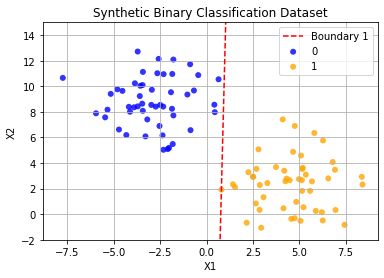

In [7]:
## Uncomment to visualize the decision boundary
## what is good about this boundary and what is not so good?

x = np.linspace(-8, 8, 10000)
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, label=label,
               alpha=0.8, edgecolors='none')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.grid(True)
ax.plot(x, boundary_1(x), '--r', label = 'Boundary 1')
ax.legend()
ax.set_ylim(-2, 15)

[Back to top](#-Index)

### Problem 2

#### Linear Boundary through Given Points

**10 Points**


Create a linear function that goes through the two points where:

- $(x_2, y_2)$ corresponds to the point in class 0 with the lowest $y$ value. 
- $(x_3, y_3)$ corresponds to the point in class 1 with the highest $y$ value.

Define your points as `x2, y2` and `x3, y3`, determine the slope and write the equation by completing the function `boundary_2` below.


In [8]:
### GRADED
x2 = ''
x3 = ''
y2 = ''
y3 = ''
slope1 = ''
def boundary_2(x):
    '''
    This function takes in an array of x and 
    returns a linear boundary between class 0 and class 1
    using slope1.
    '''
    pass

# YOUR CODE HERE
#raise NotImplementedError()
y2 = df[df['class'] == 0]['y'].min()
y3 = df[df['class'] == 1]['y'].max()
x2 = df[(df['class'] == 0) & (df['y'] == y2)]['x'].values[0]
x3 = df[(df['class'] == 1) & (df['y'] == y3)]['x'].values[0]
slope1 = (y2 - y3)/(x2 - x3)
def boundary_2(x):
    return (-slope1 * (x2 - x) + y2)

    
    
### ANSWER CHECK
print((x2, y2))
print((x3, y3))
print(slope1)

(-2.3256760699817454, 5.039148298996536)
(4.110565169752189, 7.41350801711997)
0.3689047115675836


(-8.0, 8.0)

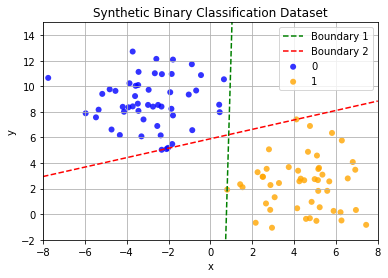

In [9]:
## Uncomment to visualize the decision boundary
## what is good about this boundary and what is not so good?

x = np.linspace(-8, 8, 10000)
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, label=label,
               alpha=0.8, edgecolors='none')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.plot(x, boundary_1(x), '--g', label = 'Boundary 1')
ax.plot(x, boundary_2(x), '--r', label = 'Boundary 2')
ax.legend()
ax.set_ylim(-2, 15)
ax.set_xlim(-8, 8)

[Back to top](#-Index)

### Problem 3

#### Intersection of Boundaries

**5 Points**

Below, the `scipy.optimize` module is used to determine the intersection of the boundaries.  The $x$ coordinate is assigned as `xint` below. Use this point to determine the $y$-coordinate of the point of intersection and assign this to `yint` below. 

In [10]:
from scipy.optimize import root

In [11]:
def intersection(x):
    '''
    This function can be used to determine
    the intersection of boundary_1 and boundary_2
    '''
    return boundary_1(x) - boundary_2(x)

xint = root(intersection, 2)['x'] #x value of intersection point
xint

array([0.87865269])

In [12]:
### GRADED
yint = ''

# YOUR CODE HERE
#raise NotImplementedError()
yint = intersection(xint)

print((xint, yint))

(array([0.87865269]), array([-1.77635684e-15]))


In [13]:
boundary_1(xint), boundary_2(xint)

(array([6.22124028]), array([6.22124028]))

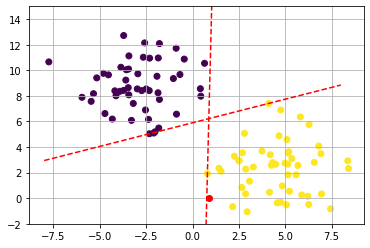

In [14]:
# Uncomment to visualize intersection point
plt.scatter(df['x'], df['y'], c = df['class'])
plt.plot(x, boundary_2(x), '--r')
plt.plot(x, boundary_1(x), '--r')
plt.plot(xint, yint, 'ro')
plt.ylim(-2, 15)
plt.grid()

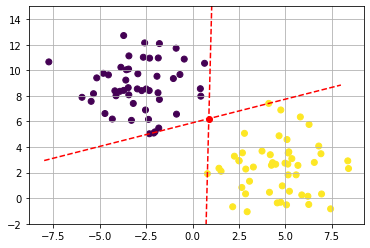

In [15]:
# Uncomment to visualize intersection point
plt.scatter(df['x'], df['y'], c = df['class'])
plt.plot(x, boundary_2(x), '--r')
plt.plot(x, boundary_1(x), '--r')
#plt.plot(xint, yint, 'ro')
plt.plot(xint,  boundary_2(xint), 'ro')
plt.ylim(-2, 15)
plt.grid()

[Back to top](#-Index)

### Problem 4

#### Linear Boundary Compromise

**10 Points**

Now, build a linear function that uses a slope that is the determined by the points:

$$(x_4, y_4) = (x0 + x2)/2, (y0 + y2)/2$$
$$(x_5, y_5) = (x1 + x3)/2, (y1 + y3)/2$$

and goes through the intersection point of the lines `boundary_1` and `boundary_2`. 


In [16]:
(𝑥0+𝑥2)/2,(𝑦0+𝑦2)/2

(-0.7616698321758635, 3.479645116019417)

In [17]:
### GRADED
x4 = ''
x5 = ''
y4 = ''
y5 = ''
slope3 = ''
def boundary_3(x):
    pass


# YOUR CODE HERE
#raise NotImplementedError()
x4, y4 = (𝑥0+𝑥2)/2,(𝑦0+𝑦2)/2
x5, y5 = (𝑥1+𝑥3)/2,(𝑦1+𝑦3)/2
slope3 = (y5 - y4)/(x5 - x4)
def boundary_3(x):
    return (-slope3 * (xint - x) + boundary_1(xint))

print((x3, y3))
print((x4, y4))

(4.110565169752189, 7.41350801711997)
(-0.7616698321758635, 3.479645116019417)


(-7.5, 10.0)

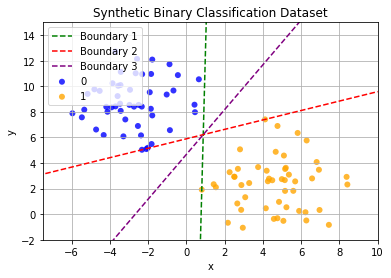

In [18]:
# Uncomment to visualize boundaries
x = np.linspace(-10, 10, 100)
fig, ax = plt.subplots()
for label, color in enumerate(['blue', 'orange']):
    ax.scatter(X[y == label][:, 0], X[y == label][:, 1], c=color, label=label,
               alpha=0.8, edgecolors='none')
ax.set_title('Synthetic Binary Classification Dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(True)
ax.plot(x, boundary_1(x), '--g', label = 'Boundary 1')
ax.plot(x, boundary_2(x), '--r', label = 'Boundary 2')
ax.plot(x, boundary_3(x), '--', color = 'purple', label = 'Boundary 3')
ax.legend()
ax.set_ylim(-2, 15)
ax.set_xlim(-7.5, 10)

[Back to top](#-Index)

### Problem 5

#### Selecting the Optimal Decision Boundary

**10 Points**

Despite all three examples being near perfect linear boundaries for the two classes, which boundary do you think would be the best for predicting new data points?  Assign your answer as a string to `ans5` below.

```
a. boundary_1
b. boundary_2
c. boundary_3
d. all are same
```


In [19]:
### GRADED
ans5 = ''
    
# YOUR CODE HERE
#raise NotImplementedError()
ans5 = 'c'

### ANSWER CHECK
print(ans5)

c
